### Question 1

In [1]:
# Assignment 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Import out data into variables and shows them in our code
train=pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Train')
test=pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Test')

In [ ]:
# Removing the House ID because it is not needed
train.drop('House ID',axis=1,inplace=True)
X_train=train.drop('Construction type',axis=1) ## feature matrix
y_train=train['Construction type'] # target variable

test.drop('House ID',axis=1,inplace=True)
X_test=test.drop('Construction type',axis=1)
y_test=test['Construction type']

In [ ]:
test

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


#### 1.

In [3]:
# Formula and data needed to solve Naive Bayes
# P(Appartment|Garages=1) = P(Garages=1|Appartment)*P(Apartment)/P(Garages=1)
# P(Appartment)= 7/20
# P(Garages=1)= 9/20
# P(Garage=1|Appartment)=3/7

In [6]:
# Columns for each feature
train.columns

Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type'],
      dtype='object')

In [8]:
# Count for all Construction types in our data
train["Construction type"].value_counts()

Apartment    7
House        7
Condo        6
Name: Construction type, dtype: int64

In [9]:
# All features of our data with only the Condo Construction type
train[train["Construction type"]=='Condo']

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo
5,6,3.8910,1.0,4.455,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.850,1.240,1.0,7,3,51,Condo
8,9,16.4202,2.5,9.800,3.420,2.0,10,5,42,Condo
13,14,5.9592,1.0,6.666,1.121,2.0,6,3,32,Condo
18,19,7.7841,1.5,7.102,1.376,1.0,6,3,17,Condo


In [10]:
# Probability of the data's Construction type
# P(Appartment)=7/20
# P(House)=7/20
# P(Condo) = 6/20

In [12]:
# Feature Garages
# P(Garages=0|CT=Appartment)= 1/7
# P(Garages=1|CT=Appartment)= 3/7
# P(Garages=1.5|CT=Appartment)= 1/7
# P(Garages=2|CT=Appartment)= 2/7

# P(Garages=0|CT=House)= 2/7
# P(Garages=1|CT=House)= 2/7
# P(Garages=1.5|CT=House)= 1/7
# P(Garages=2|CT=House)= 2/7

# P(Garages=0|CT=Condo)= 0/6
# P(Garages=1|CT=Condo)= 4/6
# P(Garages=1.5|CT=Condo)= 0/6
# P(Garages=2|CT=Condo)= 2/6


In [11]:
# Feature Bathrooms
# P(Bathrooms=1|CT=Appartment)= 5/7
# P(Bathrooms=1.5|CT=Appartment)= 1/7
# P(Bathrooms=2.5|CT=Appartment)= 1/7

# P(Bathrooms=1|CT=House)= 6/7
# P(Bathrooms=1.5|CT=House)= 1/7
# P(Bathrooms=2.5|CT=House)= 0/7

# P(Bathrooms=1|CT=Condo)= 4/6
# P(Bathrooms=1.5|CT=Condo)= 1/6
# P(Bathrooms=2.5|CT=Condo)= 1/6

In [15]:
# P(Apartment|Garages) = ( P(Garages|Apartment) * P(Apartment) ) / P(Garages = 3)
# P(Apartment) = 7/20
# P(Garages) = 9/20
# P(Garage=1|Apartment) = 3/7
P_A_G1 = ( (3/7)*(7/20) ) / (9/20)
P_A_G1

0.3333333333333333

In [14]:
# P(Appartment|Rooms=5) = P(Rooms=5|Appartment)*P(Apartment)/P(Rooms=5)
# P(Appartment)= 7/20
# P(Rooms=5)= 2/20
# P(Rooms=5|Appartment)=1/7
P_A_R5 = ((1/7)*(7/20))/(2/20)
P_A_R5

0.49999999999999994

In [16]:
# All features of our data with only the Apartment Construction type
train[train['Construction type']=='Apartment']

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment
9,10,14.4598,2.5,12.800,3.000,2.0,9,5,14,Apartment
14,15,5.0500,1.0,5.000,1.020,0.0,5,2,46,Apartment
16,17,8.2464,1.5,5.150,1.664,2.0,8,4,50,Apartment
19,20,9.0384,1.0,7.800,1.500,1.5,7,3,23,Apartment


#### 2

In [17]:
# P(Appartment)=7/20
# P(House)=7/20
# P(Condo) = 6/20

In [18]:
# Feature Garages
# P(Garages=0|CT=Appartment)= 1/7
# P(Garages=1|CT=Appartment)= 3/7
# P(Garages=1.5|CT=Appartment)= 1/7
# P(Garages=2|CT=Appartment)= 2/7

# P(Garages=0|CT=House)= 2/7
# P(Garages=1|CT=House)= 2/7
# P(Garages=1.5|CT=House)= 1/7
# P(Garages=2|CT=House)= 2/7

# P(Garages=0|CT=Condo)= 0/6
# P(Garages=1|CT=Condo)= 4/6
# P(Garages=1.5|CT=Condo)= 0/6
# P(Garages=2|CT=Condo)= 2/6

In [19]:
# Feature Bathrooms
# P(Bathrooms=1|CT=Appartment)= 5/7
# P(Bathrooms=1.5|CT=Appartment)= 1/7
# P(Bathrooms=2.5|CT=Appartment)= 1/7

# P(Bathrooms=1|CT=House)= 6/7
# P(Bathrooms=1.5|CT=House)= 1/7
# P(Bathrooms=2.5|CT=House)= 0/7

# P(Bathrooms=1|CT=Condo)= 4/6
# P(Bathrooms=1.5|CT=Condo)= 1/6
# P(Bathrooms=2.5|CT=Condo)= 1/6

In [20]:
# Number of Bathrooms and Garages in our test data
test[['Bathrooms','# Garages']]

,Bathrooms,# Garages
0,1.5,1.0
1,1.5,2.0
2,1.0,2.0
3,1.5,1.5
4,1.5,2.0


In [21]:
# For the first sample in the test set
print(test[['Bathrooms','# Garages']].iloc[0])
P_Apartment_X = (1/7)*(3/7)*(7/20)
P_House_X= (1/7)*(2/7)*(7/20)
P_Condo_X = (1/6)*(4/6)*(6/20)
print(P_Apartment_X,P_House_X,P_Condo_X)
print('First sample: Condo ')

Bathrooms    1.5
# Garages    1.0
Name: 0, dtype: float64
0.021428571428571425 0.014285714285714284 0.03333333333333333
First sample: Condo 


In [22]:
# For the second sample in the test set
print(test[['Bathrooms','# Garages']].iloc[1])
P_Apartment_X = (1/7)*(2/7)*(7/20)
P_House_X= (1/7)*(2/7)*(7/20)
P_Condo_X = (1/6)*(2/6)*(6/20)
print(P_Apartment_X,P_House_X,P_Condo_X)
print('Second sample: Condo ')

Bathrooms    1.5
# Garages    2.0
Name: 1, dtype: float64
0.014285714285714284 0.014285714285714284 0.016666666666666666
Second sample: Condo 


In [23]:
# For the third sample in the test set
print(test[['Bathrooms','# Garages']].iloc[2])
P_Apartment_X = (5/7)*(2/7)*(7/20)
P_House_X= (6/7)*(2/7)*(7/20)
P_Condo_X = (4/6)*(2/6)*(6/20)
print(P_Apartment_X,P_House_X,P_Condo_X)
print('Third sample: House ')

Bathrooms    1.0
# Garages    2.0
Name: 2, dtype: float64
0.07142857142857142 0.0857142857142857 0.06666666666666667
Third sample: House 


In [24]:
# For the fourth sample in the test set
print(test[['Bathrooms','# Garages']].iloc[3])
P_Apartment_X = (1/7)*(1/7)*(7/20)
P_House_X= (1/7)*(1/7)*(7/20)
P_Condo_X = (1/6)*(0/6)*(6/20)
print(P_Apartment_X,P_House_X,P_Condo_X)
print('Fourth sample: House/Apartment ')

Bathrooms    1.5
# Garages    1.5
Name: 3, dtype: float64
0.007142857142857142 0.007142857142857142 0.0
Fourth sample: House/Apartment 


In [25]:
# For the fifth sample in the test set
print(test[['Bathrooms','# Garages']].iloc[4])
P_Apartment_X = (1/7)*(2/7)*(7/20)
P_House_X= (1/7)*(2/7)*(7/20)
P_Condo_X = (1/6)*(2/6)*(6/20)
print(P_Apartment_X,P_House_X,P_Condo_X)
print('Fifth sample: Condo')

Bathrooms    1.5
# Garages    2.0
Name: 4, dtype: float64
0.014285714285714284 0.014285714285714284 0.016666666666666666
Fifth sample: Condo


### Question 2

In [26]:
train=pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Train')
test=pd.read_excel('Asssignment4_Data.xlsx',sheet_name='Test')

In [27]:
test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [31]:
# Dropping House ID since it is not a relevant feature for the classification task
# train.drop('House ID',axis=1,inplace=True)
X_train=train.drop('Construction type',axis=1) ## feature matrix
y_train=train['Construction type'] # target variable

# test.drop('House ID',axis=1,inplace=True)
X_test=test.drop('Construction type',axis=1)
y_test=test['Construction type']

#### 1.

In [32]:
# Default max_depth
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [34]:
y_test_pred

array(['Condo', 'Condo', 'Condo', 'Apartment', 'Apartment'], dtype=object)

In [35]:
y_test.values

array(['Apartment', 'House', 'House', 'Apartment', 'Apartment'],
      dtype=object)

In [36]:
2/5

0.4

In [37]:
print('Train Accuracy: ',accuracy_score(y_train,y_train_pred))
print('Test Accuracy: ',accuracy_score(y_test,y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.4


#### 2

In [38]:
# Giving or setting our max_depth a value
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [40]:
print('Train Accuracy: ',accuracy_score(y_train,y_train_pred))
print('Test Accuracy: ',accuracy_score(y_test,y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.4


In [42]:
# When we have high max_depth parameter, the model overfits. This makes the train accuracy increase
# However the test accuracy is low

# But when there is low high max_depth, the model reduces overfitting and makes both the train and test accuracy similar

#### 3

In [41]:
# Restricting the depth will avoid the model to overfit. Larger depth means the model is more complex, so the train set can learn better.
# However, it is not able to generalize well to new dataset. Like the test set

#### 4

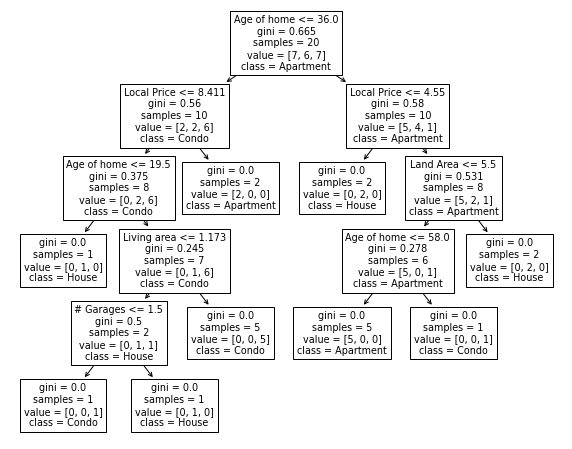

In [47]:
plt.figure(figsize=(10,8))
plot_tree(model, max_depth=5, feature_names=X_train.columns, class_names=list(y_train.unique()));

Given the features: Local Price 9.0384
Bathrooms 1
Land Area 7.8
Living area 1.5
Garages 1.5
Rooms 7
Bedrooms 3
Age of home 23


Based on the given features, that sample is an Apartment

We verify with the trained model, we feed the features to the model and get the prediction

In [48]:
sample=np.array([9.0384,1,7.8,1.5,1.5,7,3,23]).reshape(1,-1)

In [49]:
model.predict(sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Apartment'], dtype=object)

### Question 3

In [50]:
# scikit learn: sklearn

In [55]:
neighbors=[1,2,3,4,5,10,20]
test_accuracies=[]
train_accuracies=[]
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_test_pred2=model.predict(X_test)
    y_train_pred2=model.predict(X_train)
    print(f'Neighbors {k},\t train accuracy {accuracy_score(y_train,y_train_pred2)}, \t test accuracy {accuracy_score(y_test,y_test_pred2)} ')
    test_accuracies.append(accuracy_score(y_test,y_test_pred2))
    train_accuracies.append(accuracy_score(y_train,y_train_pred2))

Neighbors 1,	 train accuracy 1.0, 	 test accuracy 0.2 
Neighbors 2,	 train accuracy 0.65, 	 test accuracy 0.2 
Neighbors 3,	 train accuracy 0.6, 	 test accuracy 0.2 
Neighbors 4,	 train accuracy 0.65, 	 test accuracy 0.2 
Neighbors 5,	 train accuracy 0.6, 	 test accuracy 0.2 
Neighbors 10,	 train accuracy 0.55, 	 test accuracy 0.4 
Neighbors 20,	 train accuracy 0.35, 	 test accuracy 0.6 


When we use a small number of neighbors, we see tha the test accuracy is very low and it does not perform better even with 5 neighbors. With small number of neighbors we can clearly see the model overfits and as we increase such number, the train accuracy reduces and it outputs a very low train accuracy with a large number of neighbors.
When we make the number of neighbors higher, like 10 or 20, we can see a better test accuracy, however the train accuracy is very low. The model underfits

Text(0, 0.5, 'Accuracy')

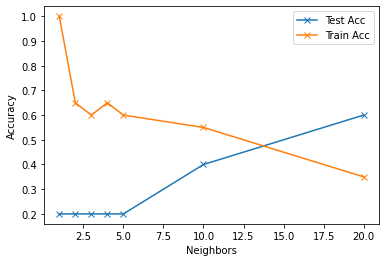

In [56]:
plt.plot(neighbors, test_accuracies,marker='x',label='Test Acc')
plt.plot(neighbors, train_accuracies,marker='x',label='Train Acc')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')


#### Implementation from scratch

In [57]:
def KNN(X_train,y_train,X_test,k):
    y_test_pred=[]
    for ii,sample in X_test.iterrows():
        euc_distances=np.sqrt(np.sum((X_train.values-sample.values)**2,axis=1))
        index_closest=euc_distances.argsort()[:k]
        print(Counter(y_train.values[index_closest]).most_common())
        output=Counter(y_train.values[index_closest]).most_common()[0][0]
        y_test_pred.append(output)
        
    return np.array(y_test_pred)

In [58]:
neighbors=[1,2,3,4,5,10,20]
test_accuracies=[]
train_accuracies=[]
for k in neighbors:
    y_test_pred3=KNN(X_train,y_train,X_test,k=k)
    print(f'Neighbors {k}, \t test accuracy {accuracy_score(y_test,y_test_pred3)} ')

[('Apartment', 1)]
[('Apartment', 1)]
[('Apartment', 1)]
[('Condo', 1)]
[('House', 1)]
Neighbors 1, 	 test accuracy 0.2 
[('Apartment', 2)]
[('Apartment', 1), ('Condo', 1)]
[('Apartment', 1), ('Condo', 1)]
[('Condo', 1), ('House', 1)]
[('House', 1), ('Condo', 1)]
Neighbors 2, 	 test accuracy 0.2 
[('Apartment', 3)]
[('Apartment', 2), ('Condo', 1)]
[('Apartment', 1), ('Condo', 1), ('House', 1)]
[('House', 2), ('Condo', 1)]
[('House', 2), ('Condo', 1)]
Neighbors 3, 	 test accuracy 0.2 
[('Apartment', 3), ('Condo', 1)]
[('Apartment', 3), ('Condo', 1)]
[('Apartment', 2), ('Condo', 1), ('House', 1)]
[('House', 3), ('Condo', 1)]
[('House', 3), ('Condo', 1)]
Neighbors 4, 	 test accuracy 0.2 
[('Apartment', 4), ('Condo', 1)]
[('Apartment', 4), ('Condo', 1)]
[('Apartment', 2), ('House', 2), ('Condo', 1)]
[('House', 4), ('Condo', 1)]
[('House', 3), ('Condo', 1), ('Apartment', 1)]
Neighbors 5, 	 test accuracy 0.2 
[('Apartment', 5), ('Condo', 4), ('House', 1)]
[('Apartment', 5), ('Condo', 4), ('H

For k=20, both House and Appartment have the same number of close neighbors, it will randomly select one, that is why the accuracy differs from the previous implementation